# SEGMENTING AND CLUSTERING TORONTO'S NEIGHBORHOOD

Patricia Avaroma\
The reason why I have to many variables for Toronto DF is that I want to see how the code works and don't alter original variables to see changes.

PART 1: DOWNLOAD AND WRANGLING DATASET \
PART 2: GETTING LATITUDES AND LONGITUDES OF TORONTO'S NEIGHBORHOODS (based on postal codes) \
PART 3: EXPLORE AND CLUSTER NEIGHBORHOODS IN THE CITY OF TORONTO

# PART 1: DOWNLOAD AND WRANGLING DATASET

1. Downloading libraries and sources to work.

In [1]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup #for parsing HTML and XML documents (parse = analizar gramaticalmente)
import requests

 Sources for scraping \
 https://beautiful-soup-4.readthedocs.io/en/latest/ \
 https://melisa-40349.medium.com/web-scraping-con-python-gu%C3%ADa-paso-a-paso-d209f0dd44e4 \
 https://www.datacamp.com/community/tutorials/web-scraping-using-python \
 https://realpython.com/beautiful-soup-web-scraper-python/ \
 https://www.edureka.co/blog/web-scraping-with-python/

2. Obtaining the data in URL and transforming it into a pandas dataframe
- Getting the HTML of the page and creating a BeautifulSoup objetc (to analyze the data)
- Getting the "table" from URL (using a tag) and transforming "table" to DataFrame "neighborhood_c"
- Getting the shape of de dataframe to know the number of rows and columns originally. 180 rows and 3 columns.
- Cleaning the dataset: Ignore cells with a borough that is "Not assigned"
    - As the postal code define the coordinates, it doesn't matter that more than 1 neighborhood belongs to the same postal code. 
- Ignore cells with same value in Borough and Neighbourhood (it was not necessary. Did not exist)
- Final shape: 103 rows and 3 columns.

In [2]:
# Getting the HTML of the page
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
results = requests.get(url)

# Create a BeautifulSoup objetc (para analizar la data)
soup = BeautifulSoup(results.content, "lxml")

In [3]:
# Getting the table from URL
table = soup.find_all("table")
    # You can use the find_all() method of soup to extract useful html tags within a webpage.
    # Examples of useful tags: < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

# Transform to DataFrame
df = pd.read_html(str(table))
neighborhood_c = pd.DataFrame(df[0])
neighborhood_c.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# first shape code (raw data). We have 180 rows and 3 columns.
neighborhood_c.shape

(180, 3)

In [5]:
# Cleaning the dataset: Ignore cells with a borough that is "Not assigned"
neighborhood_c2 = neighborhood_c.copy()
index_names = neighborhood_c2[neighborhood_c2.Borough == "Not assigned"].index
neighborhood_c2.drop(index_names, inplace = True)
neighborhood_c2 = neighborhood_c2.reset_index(drop=True)
neighborhood_c2.head(10)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
# Split dataset to have postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data
#neighborhood_c3 = neighborhood_c2.copy()
#neighborhood_c3["Neighbourhood"]=neighborhood_c3["Neighbourhood"].str.split(",")
#neighborhood_c3 = neighborhood_c3.apply(pd.Series.explode)
#neighborhood_c3 = neighborhood_c3.reset_index(drop=True)
#neighborhood_c3.head(5)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
3,M5A,Downtown Toronto,Harbourfront
4,M6A,North York,Lawrence Manor


In [6]:
# Ignore cells with same value in Borough and Neighbourhood
neighborhood_c3 = neighborhood_c2.copy()
index_names_2 = neighborhood_c3[neighborhood_c3.Borough == neighborhood_c3.Neighbourhood].index
neighborhood_c3.drop(index_names_2, inplace = True)
neighborhood_c3 = neighborhood_c3.reset_index(drop=True)
neighborhood_c3.head(10)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [7]:
# Final shape
neighborhood_c3.shape

(103, 3)

# PART 2: GETTING LATITUDES AND LONGITUDES OF TORONTO'S NEIGHBORHOODS (based on postal codes)

1. Downloading libraries

In [8]:
!pip install geocoder
import geocoder

2. Getting coordinates from CSV file (geocoder not used)
- Installing and importing geocoder to retrieve coordinates (option 1) - not used.
- Getting latitudes and longitudes data from CSV file (option 2) - used.
- Merging neighborhood_c3 df and coordinates df to the new variable named df_Toronto (only coincidences between 2 df)
- Getting the new shape. We have the same quantity of rows but now 2 more colums (total=5)

In [9]:
# @hidden_cell
# this part was not used. I worked with CSV
#latitude = []
#longitude = []

#for code in neighborhood_c4["Postal Code"]:
   # g = geocoder.arcgis("{}, Toronto, Ontario".format(code))
    #print(code, g.latlng)
   # while (g.latlng is None):
       # g = geocoder.arcgis("{}, Toronto, Ontario".format(code))
      #  print (code, g.latlng)
  #  latlng = g.latlng
   # latitude.append(latlng[0])
   # longitude.append(latlng[1])

In [10]:
# Getting latitudes and longitudes data from CSV file
latlong_df = r"http://cocl.us/Geospatial_data"
coordinates = pd.read_csv(latlong_df)
coordinates.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
# Merging neighborhood_c3 and coordinates
df_Toronto = pd.merge(neighborhood_c3, coordinates, how="inner")
df_Toronto = df_Toronto.reset_index(drop=True)
df_Toronto.rename(columns={"Neighbourhood":"Neighborhood"}, inplace=True)
df_Toronto.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [12]:
df_Toronto.shape

(103, 5)

# PART 3: EXPLORE AND CLUSTER NEIGHBORHOODS IN THE CITY OF TORONTO

1. Importing libraries

In [13]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import folium

Solving environment: ...working... done

# All requested packages already installed.

Requirement already up-to-date: matplotlib in c:\users\patty\anaconda3\lib\site-packages (3.3.3)


In C:\Users\Patty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Patty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Patty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Patty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Patty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

2. Exploring
- Only information: The original dataframe (df_Toronto) has 10 boroughs and 103 neighborhoods (or group of neighborhoods) that belong to the same postal code.
- Filtering df_Toronto to work only with boroughs that contain the word Toronto. It's stored in a new variable called df_Toronto2.
- Counting the number of boroughs and neighborhoods to work with.
- Exploring Toronto: Building a function to save venues from Toronto (radius=300 meters).
- Getting the venues with the function created.
- Building a dataframe with the information above.
- Cleaning dataset ignoring venues called "Neighborhood".
- Checking number of venues for each neighborhood (group by neighborhood).
- Analizing each Neighborhood with one hot encoding.
- Adding column Neighborhood to the one-code df.
    - 1st: create a variable with Neighborhood values named "data".
    - 2d: insert the new column with its respective values in variable "data", placed in the 1st column (0).
    - 3rd: reset index.
- Taking a look to the mean of the frequency of ocurrence of each Neighborhood (this will be used to calculate the distance to the centroids).
- Printing each Neighborhood with the top 5 most common venues.
- Transforming top venues into a dataframe.
    1. Writting a function to sort the venues in descending order.
    2. Running the new function with top 5 places and put it in a Dataframe.
- Cluster Neighborhoods.
    1. Lables for the model.
    2. Best K (Elbow model).
    3. K-means to cluster.
    3. Add the cluster to a new Dataframe and merge with Toronto dataframe.
    4. Getting Toronto, Canada coordinates for mapping
    5. Create the map.

In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Toronto['Borough'].unique()),
        df_Toronto.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods.


In [16]:
#Filtering the original dataframe to work only with borough which contain the word "Toronto".\
df_Toronto_2 = df_Toronto.copy()
df_Toronto_2 = df_Toronto_2[df_Toronto_2['Borough'].str.contains("Toronto")]
df_Toronto_2.head(5)                 

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [17]:
# Counting the number of boroughs retrieved
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Toronto_2['Borough'].unique()),
        df_Toronto_2.shape[0]))

The dataframe has 4 boroughs and 39 neighborhoods.


In [18]:
# @hidden_cell
CLIENT_ID = 'ZJRZWBIOWJRJWZW04XW2XOOPRYKGAIVRPPEHGZMGVULBCMJR' 
CLIENT_SECRET = 'HT4ZHLOXYEQYGMFHTE35J4SLRHKM5JOFYDZLSXTXI1W3O0ZH'
VERSION = '20180605'
LIMIT = 100

In [19]:
# Exploring Toronto: Building a function to save venues from Toronto in a radius of 300
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# Getting the venues with the function created
Toronto_venues = getNearbyVenues (names =df_Toronto_2["Neighborhood"], latitudes =df_Toronto_2["Latitude"], longitudes = df_Toronto_2["Longitude"])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [21]:
# Building a DataFrame
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center


In [24]:
# Cleaning dataset: Running the codes below I had some problem adding the column "Neighborhood" because it already existed,so I identified the rows where this value was stored in Venue Category's column and dropped it (rows) before one-hot encode it.
print(Toronto_venues[Toronto_venues["Venue Category"]=="Neighborhood"].index.values)

[222]


In [25]:
# Drop rows with "Neighborhood values" into Venue Category because it is not clear information about categories we need.
index_names2 = Toronto_venues[Toronto_venues["Venue Category"] == "Neighborhood"].index
Toronto_venues.drop(index_names2, inplace = True)
Toronto_venues = Toronto_venues.reset_index(drop=True)
Toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
5,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
6,"Regent Park, Harbourfront",43.65426,-79.360636,Enoch Turner Schoolhouse,43.652873,-79.361672,History Museum
7,"Regent Park, Harbourfront",43.65426,-79.360636,Buster's Sea Cove Truck,43.653647,-79.357878,Food Truck
8,"Regent Park, Harbourfront",43.65426,-79.360636,Sackville Playground,43.654656,-79.359871,Park
9,"Regent Park, Harbourfront",43.65426,-79.360636,Massimo Bruno Supper Club,43.654763,-79.359511,Italian Restaurant


In [26]:
Toronto_venues.shape

(899, 7)

In [27]:
# Number of venues in the Dataframe (uniques)
len(Toronto_venues['Venue Category'].unique())

193

In [28]:
# Checking number of venues for each neighborhood 
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,8,8,8,8,8,8
"Brockton, Parkdale Village, Exhibition Place",19,19,19,19,19,19
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",7,7,7,7,7,7
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",5,5,5,5,5,5
Central Bay Street,33,33,33,33,33,33
Christie,8,8,8,8,8,8
Church and Wellesley,53,53,53,53,53,53
"Commerce Court, Victoria Hotel",73,73,73,73,73,73
Davisville,24,24,24,24,24,24


In [29]:
# Analizing each Neighborhood with one hot encoding
toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()

,Accessories Store,Adult Boutique,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Arts & Crafts Store,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Adding column Neighborhood to the one-code df.
  # 1st: create a variable with Neighborhood values named "data".
  # 2d: insert the new column with its respective values in variable "data", placed in the 1st column (0).
  # 3rd: reset index.
data = Toronto_venues["Neighborhood"]
toronto_onehot.insert(0, "Neighborhood", data)
toronto_onehot = toronto_onehot.reset_index(drop=True)
toronto_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Taking a look to the mean of the frequency of ocurrence of each Neighborhood (this will be used to calculate the distance to the centroids)
toronto_grouped = toronto_onehot.groupby("Neighborhood").mean().reset_index()
toronto_grouped.head(5)

,Neighborhood,Accessories Store,Adult Boutique,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0
2,"Business reply mail Processing Centre, South C...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0,0.2,0.2,0.2,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Central Bay Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [32]:
# Confirming the new size
toronto_grouped.shape

(38, 194)

In [33]:
# Printing each Neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped["Neighborhood"] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0      Beer Bar  0.12
1    Restaurant  0.12
2  Liquor Store  0.12
3           Pub  0.12
4  Concert Hall  0.12


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.11
1  Sandwich Place  0.11
2             Gym  0.11
3       Bookstore  0.05
4     Coffee Shop  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0               Brewery  0.14
1  Fast Food Restaurant  0.14
2        Farmers Market  0.14
3                  Park  0.14
4                Garden  0.14


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0         Coffee Shop   0.2
1  Airport Food Court   0.2
2        Airport Gate   0.2
3      Airport Lounge   0.2
4    Airport Terminal   0.2


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.36
1   

In [34]:
# Transforming top venues into a dataframe: Writting a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
# Transforming top venues into a dataframe: Running the function with top 5
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Concert Hall,Italian Restaurant,Pub,Restaurant,Liquor Store
1,"Brockton, Parkdale Village, Exhibition Place",Gym,Sandwich Place,Café,Tech Startup,Pet Store
2,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Farmers Market,Park,Light Rail Station,Auto Workshop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal
4,Central Bay Street,Coffee Shop,Café,Restaurant,Sandwich Place,Italian Restaurant


In [36]:
#  Cluster Neighborhoods: labels for the model
toronto_grouped_clustering = toronto_grouped.drop("Neighborhood", 1)
toronto_grouped_clustering

,Accessories Store,Adult Boutique,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Arepa Restaurant,Art Gallery,Arts & Crafts Store,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.2,0.2,0.2,0.2,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.018868,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.027397,0.000000,0.013699,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
#  Cluster Neighborhoods: Best k - Elbow model (Running K-means with a range of k and plotting - K-means only works with continuos data).
    # source: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
    # source2: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
    # source3: https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
mapping = {}
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
    mapping[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 

In [38]:
for key,val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.3781807005390797
2 : 0.35114352299741086
3 : 0.3240474678496533
4 : 0.2974322575663423
5 : 0.27018643144133403
6 : 0.24277446468841474
7 : 0.2235375814689652
8 : 0.20796115121326186
9 : 0.19672207843553977
10 : 0.18324962866419944
11 : 0.1754881129241194
12 : 0.16230344056223606
13 : 0.1532901939680406
14 : 0.1418357493206636


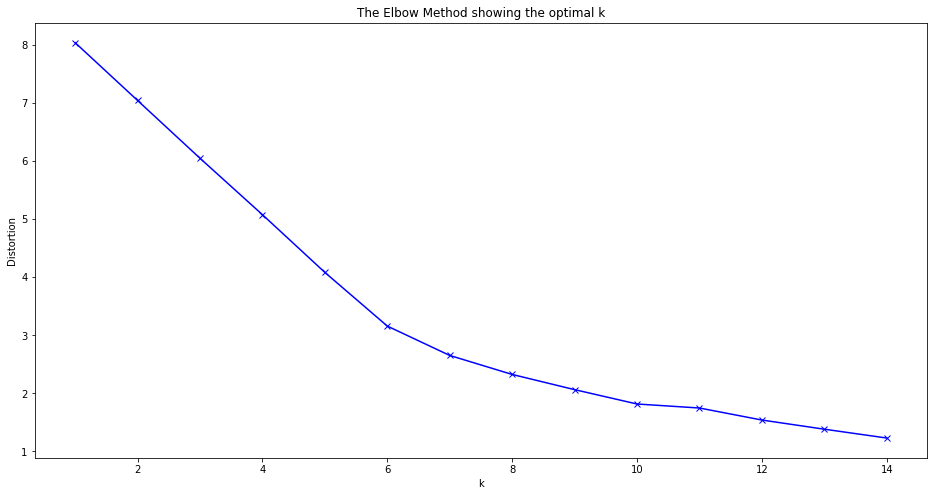

In [39]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
# Cluster Neighborhoods:: K-means to cluster
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_.astype(int)
kmeans.labels_[0:10]

array([0, 4, 0, 4, 4, 4, 4, 4, 4, 0])

In [41]:
# Cluster Neighborhoods:: Add clusters labels to Dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_Toronto_2 # dataframe with borough that only contain the word "Toronto"

# merge toronto_merged with df_Toronto_2 to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Park,History Museum,Coffee Shop,Breakfast Spot,Bus Stop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Italian Restaurant,Park,Café,Sandwich Place
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Movie Theater
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Gastropub,Coffee Shop,Restaurant,Japanese Restaurant,Gym
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Playground,Park,Trail,Discount Store,Falafel Restaurant


In [42]:
toronto_merged["Cluster Labels"].unique()

array([0, 4, 7, 1, 5, 2, 6, 3])

In [43]:
toronto_merged.shape

(38, 11)

In [54]:
# Getting Toronto, Canada coordinates
address = 'Toronto'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [57]:
# Create the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Eximine clusters

In [58]:
# Cluster 1 (0) - Venues to eat around.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 0, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Regent Park, Harbourfront",Park,History Museum,Coffee Shop,Breakfast Spot,Bus Stop
4,The Beaches,Playground,Park,Trail,Discount Store,Falafel Restaurant
5,Berczy Park,Concert Hall,Italian Restaurant,Pub,Restaurant,Liquor Store
9,"Dufferin, Dovercourt Village",Pharmacy,Bank,Grocery Store,Middle Eastern Restaurant,Music Venue
11,"Little Portugal, Trinity",Bar,Asian Restaurant,Vietnamese Restaurant,Yoga Studio,Cuban Restaurant
15,"India Bazaar, The Beaches West",Light Rail Station,Italian Restaurant,Pet Store,Pizza Place,Playground
20,Davisville North,Breakfast Spot,Pool,Convenience Store,Gym / Fitness Center,Gym
24,"The Annex, North Midtown, Yorkville",Sandwich Place,Cheese Shop,Burger Joint,Park,Liquor Store
30,"Kensington Market, Chinatown, Grange Park",Café,Chinese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Cocktail Bar
37,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Farmers Market,Park,Light Rail Station,Auto Workshop


In [59]:
# Cluster 2 (1) - Health places to visit around.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 1, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Roselawn,Health & Beauty Service,History Museum,Farmers Market,Falafel Restaurant,Ethiopian Restaurant


In [60]:
# Cluster 3 (2) - Places to spend time.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 2, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,"High Park, The Junction South",Bowling Alley,Cosmetics Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [61]:
# Cluster 4 (3) - Parks.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 3, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,"Moore Park, Summerhill East",Park,Yoga Studio,Distribution Center,Farmers Market,Falafel Restaurant


In [62]:
# Cluster 5 (4) - Coffee shops.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 4, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Queen's Park, Ontario Provincial Government",Coffee Shop,Italian Restaurant,Park,Café,Sandwich Place
2,"Garden District, Ryerson",Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Movie Theater
3,St. James Town,Gastropub,Coffee Shop,Restaurant,Japanese Restaurant,Gym
6,Central Bay Street,Coffee Shop,Café,Restaurant,Sandwich Place,Italian Restaurant
7,Christie,Grocery Store,Flower Shop,American Restaurant,Café,Coffee Shop
8,"Richmond, Adelaide, King",Coffee Shop,Steakhouse,Asian Restaurant,Seafood Restaurant,Hotel
10,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Café,Plaza,Sports Bar,Bank
12,"The Danforth West, Riverdale",Greek Restaurant,Restaurant,Ice Cream Shop,Yoga Studio,Italian Restaurant
13,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Deli / Bodega,Restaurant,Café,Salad Place
14,"Brockton, Parkdale Village, Exhibition Place",Gym,Sandwich Place,Café,Tech Startup,Pet Store


In [63]:
# Cluster 6 (5) - Acessories store.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 5, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
21,"Forest Hill North & West, Forest Hill Road Park",Accessories Store,History Museum,Farmers Market,Falafel Restaurant,Ethiopian Restaurant


In [64]:
# Cluster 7 (6) - Sushi restaurants
toronto_merged.loc[toronto_merged["Cluster Labels"] == 6, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,"North Toronto West, Lawrence Park",Sushi Restaurant,Yoga Studio,Distribution Center,Farmers Market,Falafel Restaurant


In [65]:
# Cluster 8 (7) - Lakes.
toronto_merged.loc[toronto_merged["Cluster Labels"] == 7, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Lawrence Park,Photography Studio,Lake,Yoga Studio,Distribution Center,Falafel Restaurant
